# TP1 Machine Learning and Data Mining


This TP is the implementation of classifiers on the famous Iris dataset using python and Jupiter notebook.

First the dataset is loaded and the data as well as the target are stored repectively in the variables **iris_X** and **iris_y**.

Further, in order to build a good model, iris dataset is split into 2 parts :Testing data and Traning data
These sub datasets are build randomly using the **numpy.random** function.

The 10 first data, after random permutation, are assigned to the  data and testing the remaining for training.

The trainning dataset is stored in the array  **iris_X_train** for the features and in the vector **iris_y_train** for the target. 
As for the testing dataset, we use **iris_X_test** and **iris_y_test** respectively for the testing features and testing target. 

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import metrics


iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target #Les labels associés à chaque enregistrement # target[0] est le label de iris['data'][0]
np.unique( iris_y )

np.random.seed (0)
indices = np.random.permutation ( len ( iris_X ) )
iris_X_train = iris_X [ indices [: -10]]
iris_y_train = iris_y [ indices [: -10]]
iris_X_test = iris_X [ indices [ -10:]]
iris_y_test = iris_y [ indices [ - 10:]]



## 1. Training of K-Nearest Neighbor for k=5

In this cell, we train our model using K nearest neighbor algoritjm with **k=5**. 
The KNN classifier is imported from **sklearn.neighbors**. The classifier is applied and distance are calculated using Eucludian distance. This is represented by the value **5** assigned to its argument **p**.

We train our model by fitting the features (**iris_X_train**) to the targets (**iris_y_train**).
Then, we try a prediction for our testing features and the result  is stored in **ypred**.

In order to see the performance of this algorithm on this dataset, a comparision is first done between the predicted testing target and the true testing target. The wrongly classified data are printed along with their position.
Below the accuracy score of the algorithm is also displayed.

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm = "auto" ,leaf_size =30 ,
    metric = "minkowski" , metric_params =None ,
    n_jobs = 1 , n_neighbors =3, p =5 ,weights = "uniform")
knn.fit(iris_X_train,iris_y_train )
y_pred=knn.predict(iris_X_test)

print("Confusion matrix")
print(metrics.confusion_matrix(iris_y_test, y_pred))

error=[]
print("\npredicted values:")
print(y_pred)
print("Actual values:")
print(iris_y_test)


for i in range(0,iris_y_test.size):
   if ypred[i]!= iris_y_test[i]:
        print("At position %d, predicted value %d dont match with true value %d"  %(i+1,ypred[i], iris_y_test[i]))
knn5=accuracy_score(iris_y_test,ypred)
print('\nAccuracy score: %.3f'%accuracy_score(iris_y_test,ypred))

Confusion matrix
[[4 0 0]
 [0 3 1]
 [0 0 2]]

predicted values:
[1 2 1 0 0 0 2 1 2 0]
Actual values:
[1 1 1 0 0 0 2 1 2 0]
At position 2, predicted value 2 dont match with true value 1

Accuracy score: 0.900


## 2. Optimal values of k

To get the optimal value of k that increases the KNN accuracy score,different values from 1 to 30 included, are passed in the **KNeighborsClassifier(n_neighbors=k)** function as k value.

The accuracy score for each value of k is stored in the vector **res [ ]**. Further, the maximum score as well as the values of k which have that score are printed.

A graph is plotted to illustrate the accuracy scores as function of the values of k.

The values of k that maximise the accuracy are:
[8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30]

Maximimum accuracy score is: 1.0000


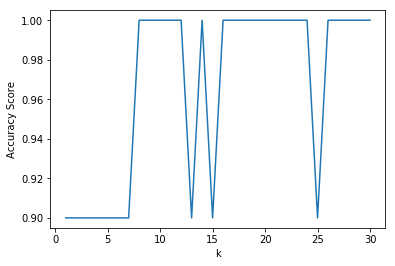

In [103]:
#values of k from 1 to 31
krange=range(1,31)
res=[]
for k in krange:
    knn=KNeighborsClassifier(algorithm = "auto" ,leaf_size =30 ,
    metric = "minkowski" , metric_params =None ,
    n_jobs = 1 , n_neighbors =k, p =2 ,weights = "uniform")
    knn.fit(iris_X_train,iris_y_train )
    
    kpred=knn.predict(iris_X_test)
    res.append(accuracy_score (iris_y_test , kpred))

k_optimal=[]
for k, j in enumerate(res):
    if j == max(res):
        k_optimal.append(k+1)
        
print("The values of k that maximise the accuracy are:")
print(k_optimal)
plt.plot(krange,res)
max_score=max(res)
print("\nMaximimum accuracy score is: %.4f"%max_score)
plt.ylabel('Accuracy Score')
plt.xlabel('k') 
plt.show()


## 3. Training with Naives Bayes Algorithm and Logistic Regression

   ### 3.1 Naive Bayes

After applying the algorithm, the confusion matrix shows us that one data out of 10 is wrongly classified.
below, The accuracy score is displayed as well as the classification error.

In [85]:
from sklearn.naive_bayes import GaussianNB
n_bayes = GaussianNB()
n_bayes.fit(iris_X_train, iris_y_train)
y_pred=n_bayes.predict(iris_X_test)
n_bayes_score=accuracy_score (iris_y_test , y_pred)
print("Confusion matrix")
print(metrics.confusion_matrix(iris_y_test, y_pred))

print("\npredicted values:")
print(y_pred)
print("Actual values:")
print(iris_y_test)
for i in range(0,iris_y_test.size):
   if ypred[i]!= iris_y_test[i]:
        print("At position %d, predicted value %d dont match with true value %d"  %(i+1,ypred[i], iris_y_test[i]))
print("\nNaive Bayes accuracy score: %.3f"%n_bayes_score)

Confusion matrix
[[4 0 0]
 [0 3 1]
 [0 0 2]]

predicted values:
[1 2 1 0 0 0 2 1 2 0]
Actual values:
[1 1 1 0 0 0 2 1 2 0]
At position 2, predicted value 2 dont match with true value 1

Naive Bayes accuracy score: 0.900


  ### 3.2 Support vector Machine Classifier

The SVM algorithm, with default arguments, gives the same accuracy score as the Naive Bayes Agorithm. 

In [98]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(iris_X_train,iris_y_train )
y_pred=svm.predict(iris_X_test)
svm_score=accuracy_score (iris_y_test ,y_pred)
print("Confusion matrix")
print(metrics.confusion_matrix(iris_y_test, y_pred))

print("\npredicted values:")
print(y_pred)
print("Actual values:")
print(iris_y_test)

for i in range(0,iris_y_test.size):
   if ypred[i]!= iris_y_test[i]:
        print("At position %d, predicted value %d is different from expected value %d"  %(i+1,ypred[i], iris_y_test[i]))
print("\nSVM accuracy score: %.3f"%svm_score)

Confusion matrix
[[4 0 0]
 [0 3 1]
 [0 0 2]]

predicted values:
[1 2 1 0 0 0 2 1 2 0]
Actual values:
[1 1 1 0 0 0 2 1 2 0]
At position 2, predicted value 2 is different from expected value 1

SVM accuracy score: 0.900


## Classifiers comparison

The bar chart displayed below shows the performance of the algorithms implemented by their **accuracy score**.
Both knn accuracy scores for **k=5** and optimal value of k.

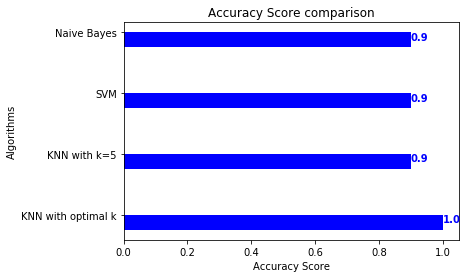

In [104]:
import matplotlib.pyplot as plt
#import plotly.plotly as py

multiple_bars = plt.figure()

xaxis=[u'KNN with optimal k',u'KNN with k=5', u'SVM', u'Naive Bayes']
yaxis =[max_score,knn5, svm_score, n_bayes_score]

fig, ax = plt.subplots()    
width = 0.25 # the width of the bars 
ind = np.arange(len(yaxis))  # the x locations for the groups
ax.barh(ind, yaxis, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(xaxis, minor=False)
plt.title('Accuracy Score comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Algorithms')    
for i, v in enumerate(yaxis):
    ax.text(v , i, str(v), color='blue', fontweight='bold')
plt.show()